### Вариант № 20


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)
# Используем библиотеку Seaborn 
import seaborn as sns
sns.set()

In [2]:

def our_function(x1, x2):
    return (x1**x1)/(1 + np.exp(-2 * x2))
x1_array = np.linspace(0, 1, num=500, endpoint=True, retstep=False, dtype=None)
x2_array = np.linspace(-3, 3, num=500, endpoint=True, retstep=False, dtype=None)
y = [our_function(x1_array[i], x2_array[i]) for i in range(x1_array.size)]

data = pd.DataFrame({
    'x1': x1_array,
    'x2': x2_array,
    'y': y
})

data.to_csv(path_or_buf = 'data/our_array.csv', index=False)

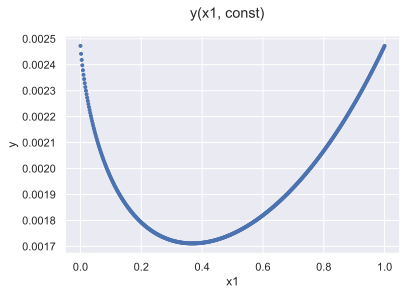

In [3]:
new = pd.read_csv('data/our_array.csv')
new.head()
chr_data1 = new.apply(lambda x: our_function(x[0], new['x2'][0]), axis=1)
plt.suptitle("y(x1, const)")
plt.xlabel("x1")
plt.ylabel("y")
plt.plot(new["x1"], chr_data1, ".")
plt.show()





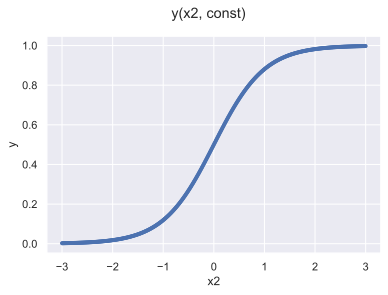

In [4]:
chr_data2 = new.apply(lambda x: our_function(new['x1'][0], x[1]), axis=1)
plt.suptitle("y(x2, const)")
plt.xlabel("x2")
plt.ylabel("y")
plt.plot(new["x2"], chr_data2, ".")
plt.show()


In [5]:
pd.DataFrame(data={"min": new.min(), "max": new.max(), "mean": new.mean()})

min  max  mean
x1  0.00e+00  1.0  0.50
x2 -3.00e+00  3.0  0.00
y   2.47e-03  1.0  0.41

In [6]:
mean_x1 = new["x1"].mean()
mean_x2 = new["x2"].mean()
trimmed = new[(new["x1"] < mean_x1) | (new["x2"] < mean_x2)]
trimmed.to_csv("trimmed_dataset.csv", index=False)

print(len(trimmed))
trimmed.head()

250


x1    x2         y
0  0.00e+00 -3.00  2.47e-03
1  2.00e-03 -2.99  2.50e-03
2  4.01e-03 -2.98  2.54e-03
3  6.01e-03 -2.96  2.58e-03
4  8.02e-03 -2.95  2.62e-03

In [7]:
figure = plt.figure().gca(projection="3d")

X1, X2 = np.meshgrid(new["x1"], new["x2"])

f = np.vectorize(our_function)

Y = f(X1, X2)

figure.plot_surface(X1, X2, Y)

figure.set_xlabel("X1", color="red")
figure.set_ylabel("X2", color="green")
figure.set_zlabel("Y", color="orange")
plt.show()

C:\Users\27C6~1\AppData\Local\Temp/ipykernel_6420/3297824218.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  figure = plt.figure().gca(projection="3d")
